# Lesson - Working with Missing Data

In [1]:
import pandas as pd
mvc = pd.read_csv("nypd_mvc_2018.csv")
mvc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57864 entries, 0 to 57863
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unique_key           57864 non-null  int64  
 1   date                 57864 non-null  object 
 2   time                 57864 non-null  object 
 3   borough              37218 non-null  object 
 4   location             53979 non-null  object 
 5   on_street            43903 non-null  object 
 6   cross_street         28615 non-null  object 
 7   off_street           13771 non-null  object 
 8   pedestrians_injured  57864 non-null  int64  
 9   cyclist_injured      57864 non-null  int64  
 10  motorist_injured     57864 non-null  int64  
 11  total_injured        57863 non-null  float64
 12  pedestrians_killed   57864 non-null  int64  
 13  cyclist_killed       57864 non-null  int64  
 14  motorist_killed      57864 non-null  int64  
 15  total_killed         57859 non-null 

In [2]:
null_counts=mvc.isnull().sum() # checking all columns for null values
print(null_counts)

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64


In [3]:
# calculate %age of null_counts in each column
null_counts_pct = null_counts / mvc.shape[0] * 100
print(null_counts_pct)

unique_key              0.000000
date                    0.000000
time                    0.000000
borough                35.680216
location                6.714019
on_street              24.127264
cross_street           50.547836
off_street             76.201092
pedestrians_injured     0.000000
cyclist_injured         0.000000
motorist_injured        0.000000
total_injured           0.001728
pedestrians_killed      0.000000
cyclist_killed          0.000000
motorist_killed         0.000000
total_killed            0.008641
vehicle_1               0.613508
vehicle_2              21.191069
vehicle_3              93.930596
vehicle_4              98.779898
vehicle_5              99.683741
cause_vehicle_1         0.302433
cause_vehicle_2        15.021430
cause_vehicle_3        93.553850
cause_vehicle_4        98.698673
cause_vehicle_5        99.666459
dtype: float64


In [4]:
# make a new dataframe to compare total entries with %age of null counts
null_df = pd.DataFrame({'null_counts': null_counts, 'null_pct': null_counts_pct})
print(null_df)


                     null_counts   null_pct
unique_key                     0   0.000000
date                           0   0.000000
time                           0   0.000000
borough                    20646  35.680216
location                    3885   6.714019
on_street                  13961  24.127264
cross_street               29249  50.547836
off_street                 44093  76.201092
pedestrians_injured            0   0.000000
cyclist_injured                0   0.000000
motorist_injured               0   0.000000
total_injured                  1   0.001728
pedestrians_killed             0   0.000000
cyclist_killed                 0   0.000000
motorist_killed                0   0.000000
total_killed                   5   0.008641
vehicle_1                    355   0.613508
vehicle_2                  12262  21.191069
vehicle_3                  54352  93.930596
vehicle_4                  57158  98.779898
vehicle_5                  57681  99.683741
cause_vehicle_1              175

In [5]:
# Verifying total_killed Columns null entries
# Create a boolean mask that checks whether each value in killed_manual_sum 
# is not equal to the values in the total_killed column
killed_cols = [col for col in mvc.columns if 'killed' in col]
killed = mvc[killed_cols].copy()
killed_manual_sum=killed.iloc[:,:3].sum(axis=1)
killed_mask=killed_manual_sum!=killed['total_killed']
killed_non_eq=killed[killed_mask]
print(killed_non_eq)

       pedestrians_killed  cyclist_killed  motorist_killed  total_killed
3508                    0               0                0           NaN
20163                   0               0                0           NaN
22046                   0               0                1           0.0
48719                   0               0                0           NaN
55148                   0               0                0           NaN
55699                   0               0                0           NaN


In [6]:
# Verifying total_injured Columns null entries

mvc_null_injured=mvc[mvc['total_injured'].isnull()] # checking total_injured column which has 1 null value
print(mvc_null_injured)

print(mvc_null_injured.loc[:,'pedestrians_injured':'total_injured'])




       unique_key        date  time borough                location on_street  \
55699     4026403  2018-09-30  6:30  QUEENS  (40.749767, -73.86381)       NaN   

      cross_street                                off_street  \
55699          NaN  102-21    ROOSEVELT AVENUE                 

       pedestrians_injured  cyclist_injured  ...  vehicle_1  vehicle_2  \
55699                    0                0  ...       Taxi        NaN   

       vehicle_3  vehicle_4  vehicle_5  cause_vehicle_1 cause_vehicle_2  \
55699        NaN        NaN        NaN      Unspecified             NaN   

      cause_vehicle_3 cause_vehicle_4 cause_vehicle_5  
55699             NaN             NaN             NaN  

[1 rows x 26 columns]
       pedestrians_injured  cyclist_injured  motorist_injured  total_injured
55699                    0                0                 1            NaN


### Filling missing entries in killed and injured data
- We use Series.mask() [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.mask.html) to replace missing values in `total_killed` and `total_injured` columns. 

In [7]:
import numpy as np
killed_null = killed['total_killed'].isnull()
killed_manual_sum=killed.iloc[:,:3].sum(axis=1)

killed['total_killed'] = killed['total_killed'].mask(killed_null, killed_manual_sum)
# we'll replace any values where the manual sum and the total column aren't equal with np.nan
killed_mask=killed_manual_sum!=killed['total_killed']
killed['total_killed'] = killed['total_killed'].mask(killed_mask, np.nan)
print(killed[killed_mask])



       pedestrians_killed  cyclist_killed  motorist_killed  total_killed
22046                   0               0                1           NaN


In [8]:
# Same operation as above for total_injured column
injured_cols = [col for col in mvc.columns if 'injured' in col]
injured=mvc[injured_cols].copy()
injured_manual_sum = injured.iloc[:,:3].sum(axis=1)
injured['total_injured'] = injured['total_injured'].mask(mvc['total_injured'].isnull(), injured_manual_sum)
# we'll replace any values where the manual sum and the total column aren't equal with np.nan
injured_mask=injured_manual_sum!=injured['total_injured'] # values where manual_sum!=total_injured
print(injured[injured_mask]) 
# valuesreplaced with NAN where manual_sum!=total_injured
injured['total_injured'] = injured['total_injured'].mask(injured_mask, np.nan)
print(injured[injured_mask]) 

       pedestrians_injured  cyclist_injured  motorist_injured  total_injured
1222                     0                0                 1            0.0
3263                     0                0                 3            4.0
3362                     0                0                 0            1.0
3508                     0                0                 0            2.0
10989                    0                0                 0            1.0
12885                    1                0                 0            0.0
13344                    0                0                 0            1.0
15213                    0                0                 0            2.0
20163                    0                0                 0            1.0
20978                    0                0                 0            1.0
23276                    0                0                 1            0.0
24907                    1                0                 0            0.0

In [9]:
# Reassigning updated values to mvc dataframe
mvc['total_killed']=killed['total_killed']
mvc['total_injured']=injured['total_injured']

In [10]:
# Visualizing missing data with plots using Seaborn heatmap
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
def plot_null_matrix(df, figsize=(18,15)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False) # ~df_null is set to display not null values in dark and null in light
    plt.xticks(rotation=90, size='x-large')
    plt.show()
    
    plot_null_matrix(mvc, figsize=(18,1))
    # Seaborn is not working with this function, so doing it manually in next code cell
    pass
    


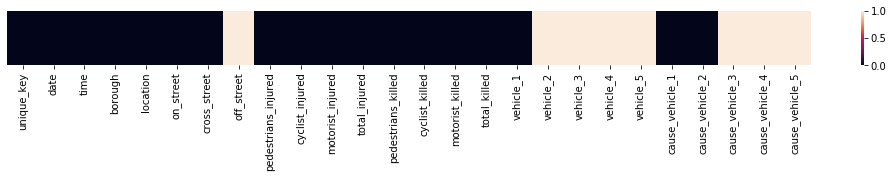

In [11]:
plt.figure(figsize=(18,1))
sns.heatmap(mvc.isnull().head(1),cbar=True,yticklabels=False)

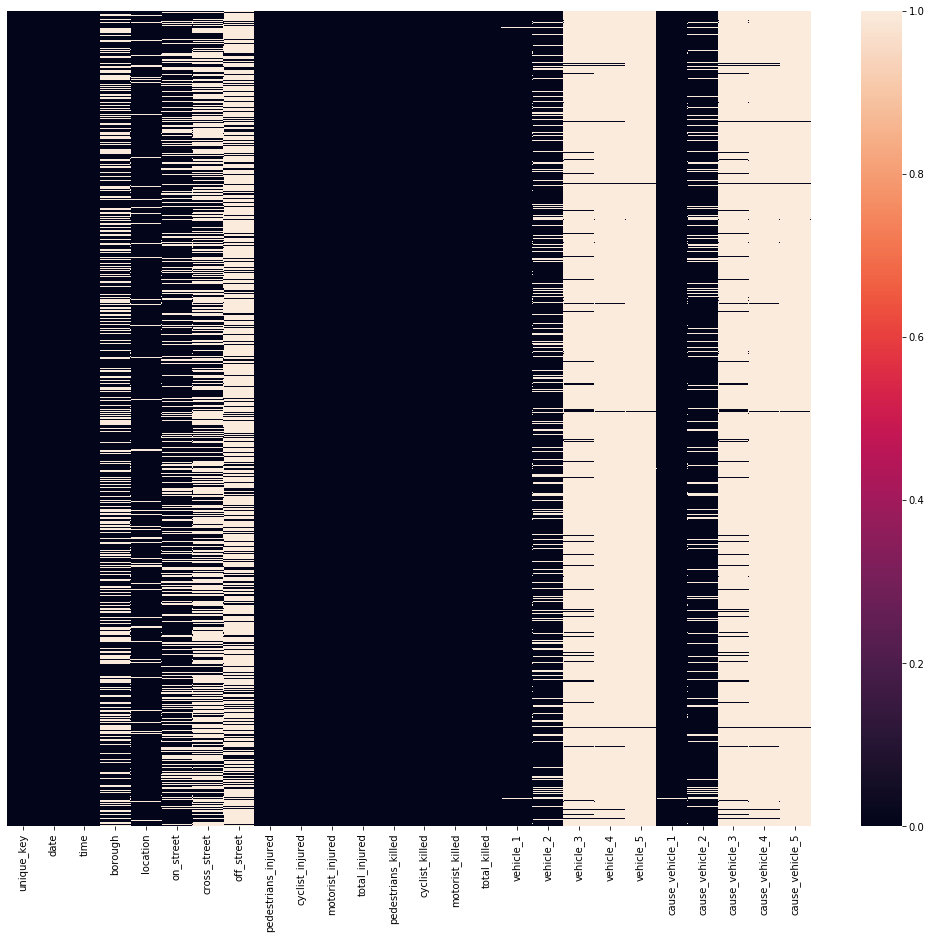

In [12]:
plt.figure(figsize=(18,15))
sns.heatmap(mvc.isnull(),cbar=True,yticklabels=False)

In [13]:
# Correlation Chart for columns with missing values (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)
cols_with_missing_vals = mvc.columns[mvc.isnull().sum() > 0]
missing_corr = mvc[cols_with_missing_vals].isnull().corr()
print(missing_corr)

                  borough  location  on_street  cross_street  off_street  \
borough          1.000000  0.190105  -0.350190      0.409107    0.362189   
location         0.190105  1.000000  -0.073975     -0.069719    0.084579   
on_street       -0.350190 -0.073975   1.000000      0.557767   -0.991030   
cross_street     0.409107 -0.069719   0.557767      1.000000   -0.552763   
off_street       0.362189  0.084579  -0.991030     -0.552763    1.000000   
total_injured   -0.002827 -0.001486   0.006220      0.002513   -0.004266   
total_killed     0.005582  0.015496  -0.002344      0.004112    0.002323   
vehicle_1       -0.018325 -0.010466  -0.001889     -0.017018    0.001812   
vehicle_2       -0.077516 -0.033842   0.119647      0.043799   -0.121129   
vehicle_3       -0.061932 -0.000927   0.020867     -0.049910   -0.022404   
vehicle_4       -0.020406  0.004655   0.004172     -0.021137   -0.004074   
vehicle_5       -0.010733 -0.005797  -0.002768     -0.012003    0.002492   
cause_vehicl

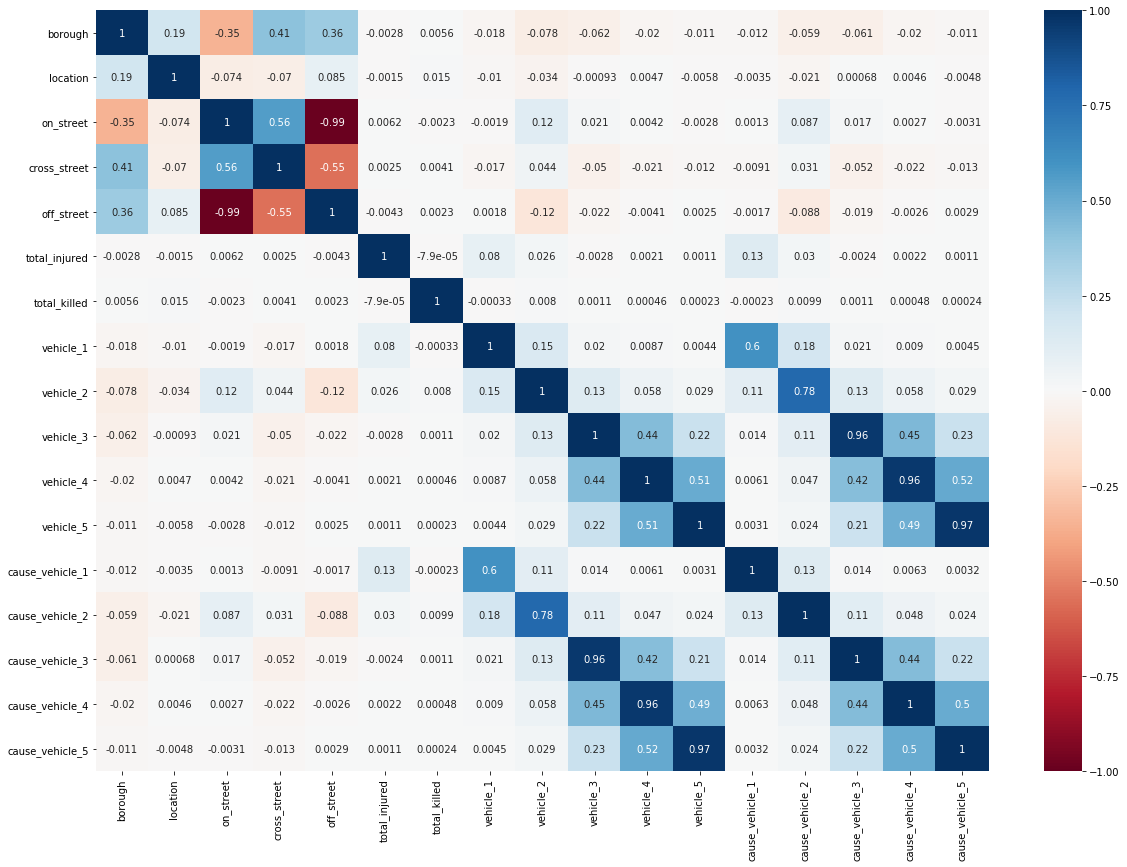

In [14]:
plt.figure(figsize=(20,14))
sns.heatmap(missing_corr,cbar=True,yticklabels=True,vmin=-1,vmax=1,cmap='RdBu',annot=True) 


In [15]:
def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a triangular mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()
    plot_null_correlations(df)

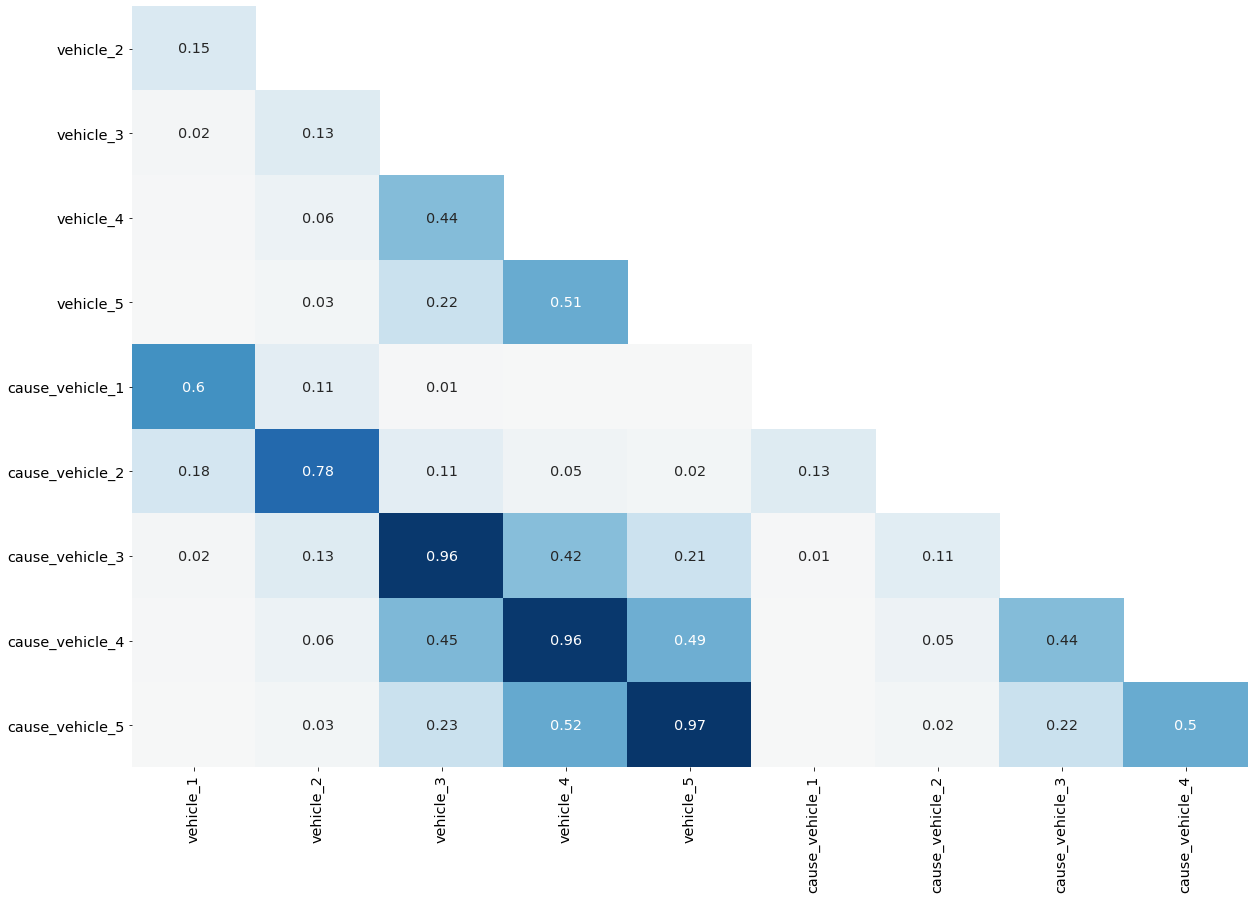

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a triangular mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()
veh_cols=[col for col in mvc.columns if 'vehicle' in col] 
vehicle=mvc[veh_cols].copy()
plot_null_correlations(vehicle)


- Analyzing Correlation in Missing Data

We will explore the variations in missing values from these five pairs of columns. We'll create a dataframe that counts, for each pair:
- The number of values where the vehicle is missing when the cause is not missing.
- The number of values where the cause is missing when the vehicle is not missing.
Below we,
- Count the number of rows where the `v_col column` is null and the `c_col column` is not null. Assign the result to `v_null`.
- Count the number of rows where the `c_col column` is null and the `v_col column` is not null. Assign the result to `c_null`.
- Append an item to the `vc_null_data` list. The item should be a list containing, in order: `v, v_null, c_null`.
- Outside the loop, create a dataframe using the `vc_null_data` list of lists.
- Use the `columns` parameter and the `col_labels` list to set the column names of the dataframe.
- Assign the dataframe to `vc_null_df`.

In [17]:
col_labels = ['v_number', 'vehicle_missing', 'cause_missing']

vc_null_data = []

for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_null=(mvc[v_col].isnull()&mvc[c_col].notnull()).sum()
    c_null=(mvc[v_col].notnull()&mvc[c_col].isnull()).sum()
    vc_null_data.append([v,v_null,c_null])
vc_null_df=pd.DataFrame(vc_null_data,columns=col_labels)    
print(vc_null_df)    

   v_number  vehicle_missing  cause_missing
0         1              204             24
1         2             3793            223
2         3              242             24
3         4               50              3
4         5               10              0


- Finding most common values across multiple columns 
- To convert a dataframe to a single column of values, we use the `DataFrame.stack(`) [method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html#pandas.DataFrame.stack), which stacks a dataframe object into a Series object. 

In [18]:
# Top Ten Causes
cause_cols = [c for c in mvc.columns if "cause_" in c]
cause = mvc[cause_cols]
print(cause.head())
cause_1d = cause.stack()
print(cause_1d.head())
cause_counts = cause_1d.value_counts()
top10_causes = cause_counts.head(10)
print(top10_causes)

         cause_vehicle_1      cause_vehicle_2 cause_vehicle_3 cause_vehicle_4  \
0  Following Too Closely          Unspecified             NaN             NaN   
1       Backing Unsafely          Unspecified             NaN             NaN   
2  Following Too Closely          Unspecified             NaN             NaN   
3                  Glare  Passing Too Closely             NaN             NaN   
4     Turning Improperly          Unspecified             NaN             NaN   

  cause_vehicle_5  
0             NaN  
1             NaN  
2             NaN  
3             NaN  
4             NaN  
0  cause_vehicle_1    Following Too Closely
   cause_vehicle_2              Unspecified
1  cause_vehicle_1         Backing Unsafely
   cause_vehicle_2              Unspecified
2  cause_vehicle_1    Following Too Closely
dtype: object
Unspecified                       57481
Driver Inattention/Distraction    17650
Following Too Closely              6567
Failure to Yield Right-of-Way      4566

In [19]:
# Top Ten Vehicles
v_cols = [c for c in mvc.columns if c.startswith("vehicle")]
vehicle=mvc[v_cols]
print (vehicle.head())
top10_vehicles=vehicle.stack().value_counts().head(10)
print(top10_vehicles)


                             vehicle_1 vehicle_2 vehicle_3 vehicle_4 vehicle_5
0                    PASSENGER VEHICLE       NaN       NaN       NaN       NaN
1        SPORT UTILITY / STATION WAGON        DS       NaN       NaN       NaN
2  Station Wagon/Sport Utility Vehicle     Sedan       NaN       NaN       NaN
3                                Sedan     Sedan       NaN       NaN       NaN
4  Station Wagon/Sport Utility Vehicle     Sedan       NaN       NaN       NaN
Sedan                                  33133
Station Wagon/Sport Utility Vehicle    26124
PASSENGER VEHICLE                      16026
SPORT UTILITY / STATION WAGON          12356
Taxi                                    3482
Pick-up Truck                           2373
TAXI                                    1892
Box Truck                               1659
Bike                                    1190
Bus                                     1162
dtype: int64


In [20]:
# Filling unknown values with a placeholder
def summarize_missing():
    v_missing_data = []

    for v in range(1,6):
        v_col = 'vehicle_{}'.format(v)
        c_col = 'cause_vehicle_{}'.format(v)

        v_missing = (mvc[v_col].isnull() & mvc[c_col].notnull()).sum()
        c_missing = (mvc[c_col].isnull() & mvc[v_col].notnull()).sum()

        v_missing_data.append([v, v_missing, c_missing])

    col_labels = columns=["vehicle_number", "vehicle_missing", "cause_missing"]
    return pd.DataFrame(v_missing_data, columns=col_labels)

summary_before = summarize_missing()
print(summary_before)
for v in range(1,6):
    v_col = 'vehicle_{}'.format(v)
    c_col = 'cause_vehicle_{}'.format(v)
    v_missing_mask = (mvc[v_col].isnull() & mvc[c_col].notnull())
    c_missing_mask = (mvc[c_col].isnull() & mvc[v_col].notnull())
    mvc[v_col] = mvc[v_col].mask(v_missing_mask, "Unspecified")
    mvc[c_col] = mvc[c_col].mask(c_missing_mask, "Unspecified")
summary_after = summarize_missing()

print(summary_after)    

   vehicle_number  vehicle_missing  cause_missing
0               1              204             24
1               2             3793            223
2               3              242             24
3               4               50              3
4               5               10              0
   vehicle_number  vehicle_missing  cause_missing
0               1                0              0
1               2                0              0
2               3                0              0
3               4                0              0
4               5                0              0


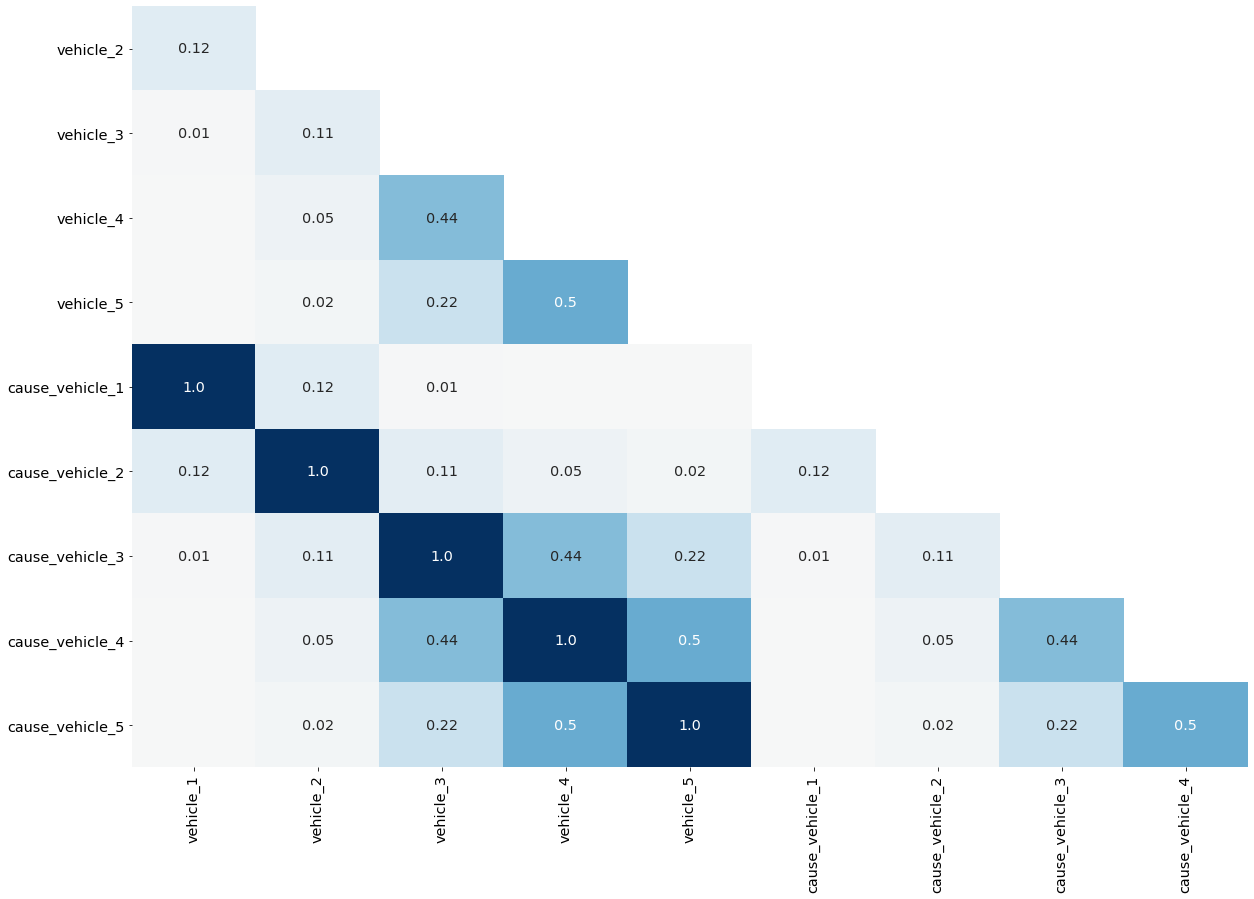

In [21]:
veh_cols = [c for c in mvc.columns if 'vehicle' in c]
plot_null_correlations(mvc[veh_cols]) # Perfect correlation now exists between vehicle and cause columns

In [22]:
# Missing data in location columns
loc_cols = ['borough', 'location', 'on_street', 'off_street', 'cross_street']
location_data = mvc[loc_cols]
print(location_data.head())

     borough                location                         on_street  \
0  MANHATTAN  (40.742832, -74.00771)  WEST 15 STREET                     
1   BROOKLYN  (40.623714, -73.99314)  16 AVENUE                          
2        NaN   (40.591755, -73.9083)  BELT PARKWAY                       
3     QUEENS   (40.73602, -73.87954)  GRAND AVENUE                       
4      BRONX  (40.884727, -73.89945)                               NaN   

                                 off_street    cross_street  
0                                       NaN       10 AVENUE  
1                                       NaN       62 STREET  
2                                       NaN             NaN  
3                                       NaN  VANLOON STREET  
4  208       WEST 238 STREET                            NaN  


In [23]:
print(location_data.isnull().sum())

borough         20646
location         3885
on_street       13961
off_street      44093
cross_street    29249
dtype: int64


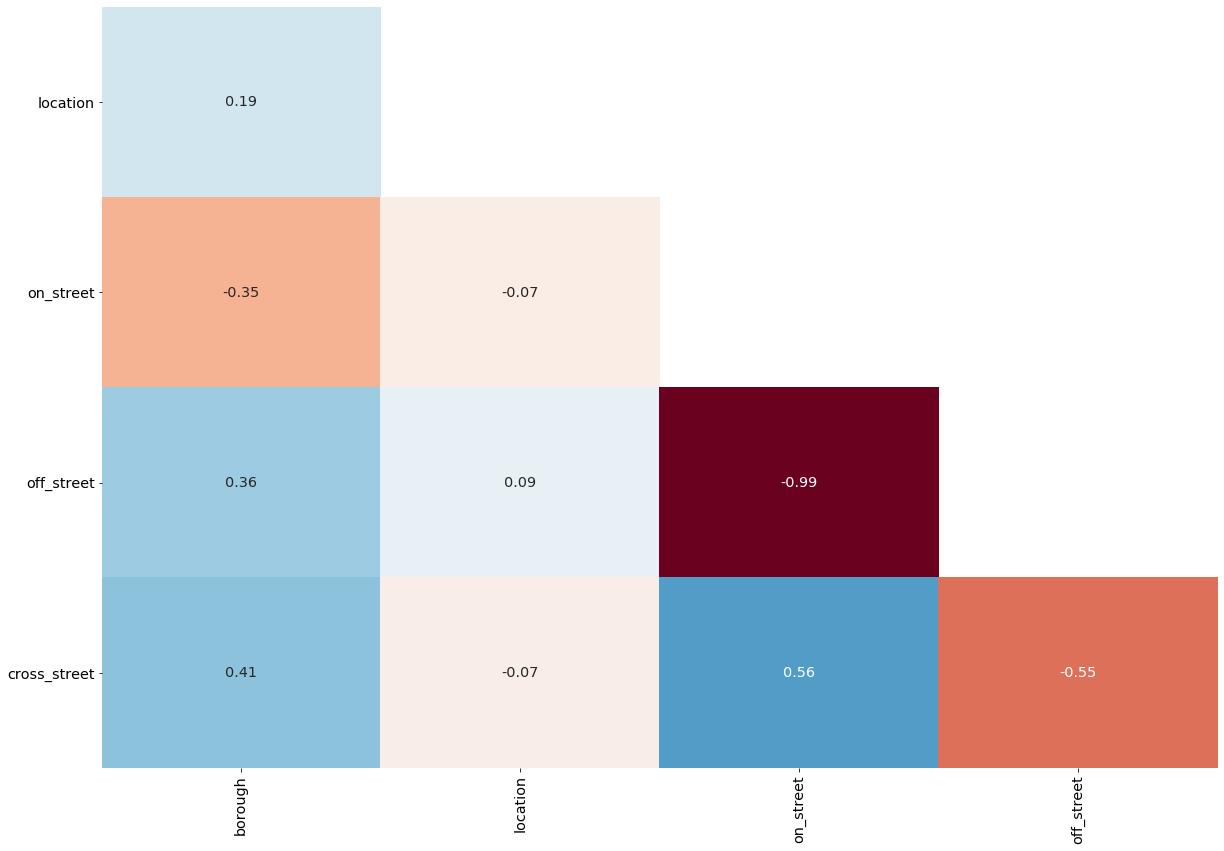

In [24]:
plot_null_correlations(location_data)

In [25]:
def plot_null_matrix(df, figsize=(18,15)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(~df_null, cbar=False, yticklabels=False) # ~df_null is set to display not null values in dark and null in light
    plt.xticks(rotation=90, size='x-large')
    plt.show()
    
    plot_null_matrix(mvc, figsize=(18,1))

In [28]:
sorted_location_data = location_data.sort_values(loc_cols)

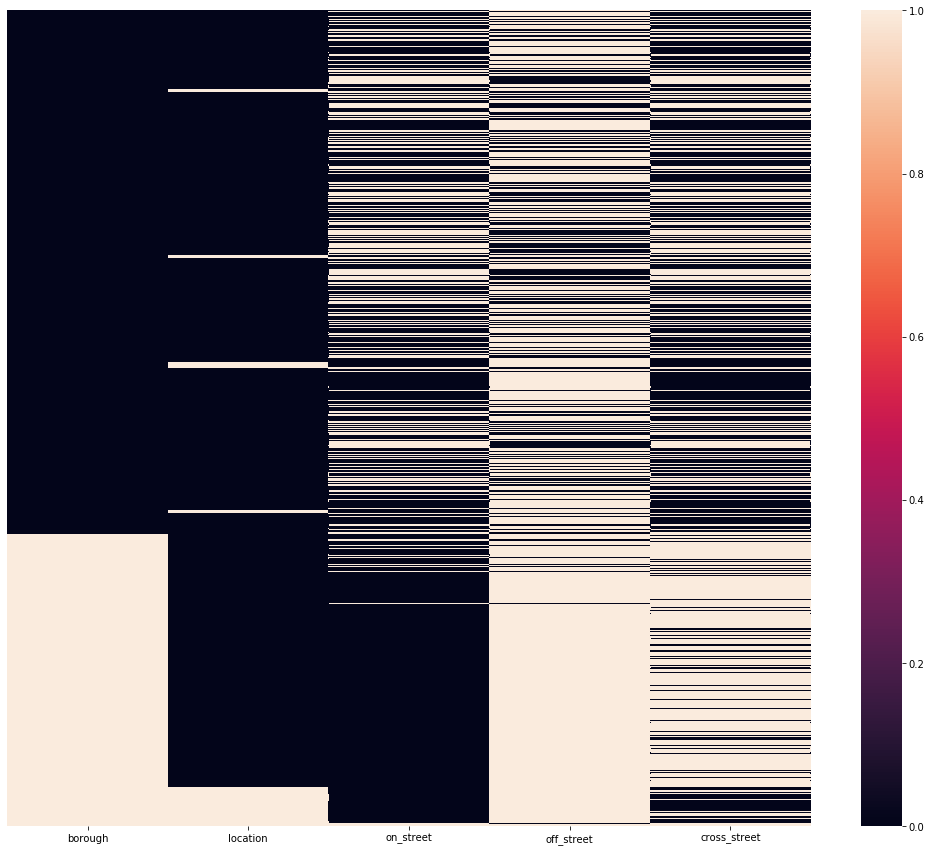

In [30]:
plt.figure(figsize=(18,15))
sns.heatmap(sorted_location_data.isnull(),cbar=True,yticklabels=False)# giving unexpected error for function null_matrix so plotted manually

- About two-thirds of rows have non-null values for borough, but of those values that are missing, most have non-null values for location and one or more of the street name columns.
- Less than one-tenth of rows have missing values in the location column, but most of these have non-null values in one or more of the street name columns.
- Most rows have a non-null value for either on_street or off_street, and some also have a value for cross_street.

### Imputing Location Data

We prepared the supplemental data using the `GeoPy` [package](https://geopy.readthedocs.io/en/latest/), which makes working with Geocoding APIs like the Google Maps API easier. Here's the strategy we used to prepare the supplemental data:

- For rows with location values but missing values in either borough or the street name columns, we used geocoding APIs to look up the location coordinates to find the missing data.
- For rows with values in the street name columns missing borough and/or location data, we used geocoding APIs to look up the address to find the missing data.
- The supplemental data is in a CSV called `supplemental_data.csv`, let's read this into a pandas dataframe and familiarize ourself with the data:

In [31]:
sup_data = pd.read_csv('supplemental_data.csv')
sup_data.head()

,unique_key,location,on_street,off_street,borough
0,3869058,NaN,NaN,NaN,NaN
1,3847947,NaN,NaN,NaN,NaN
2,3914294,NaN,BELT PARKWAY,NaN,BROOKLYN
3,3915069,NaN,NaN,NaN,NaN
4,3923123,NaN,NaN,NaN,NaN


The supplemental data has five columns from our original data set — `the unique_key` that identifies each collision, and four of the five location columns. The `cross_street` column is not included because the geocoding APIs we used don't include data on the nearest cross street to any single location.

Let's take a look at a null matrix for the supplemental data:

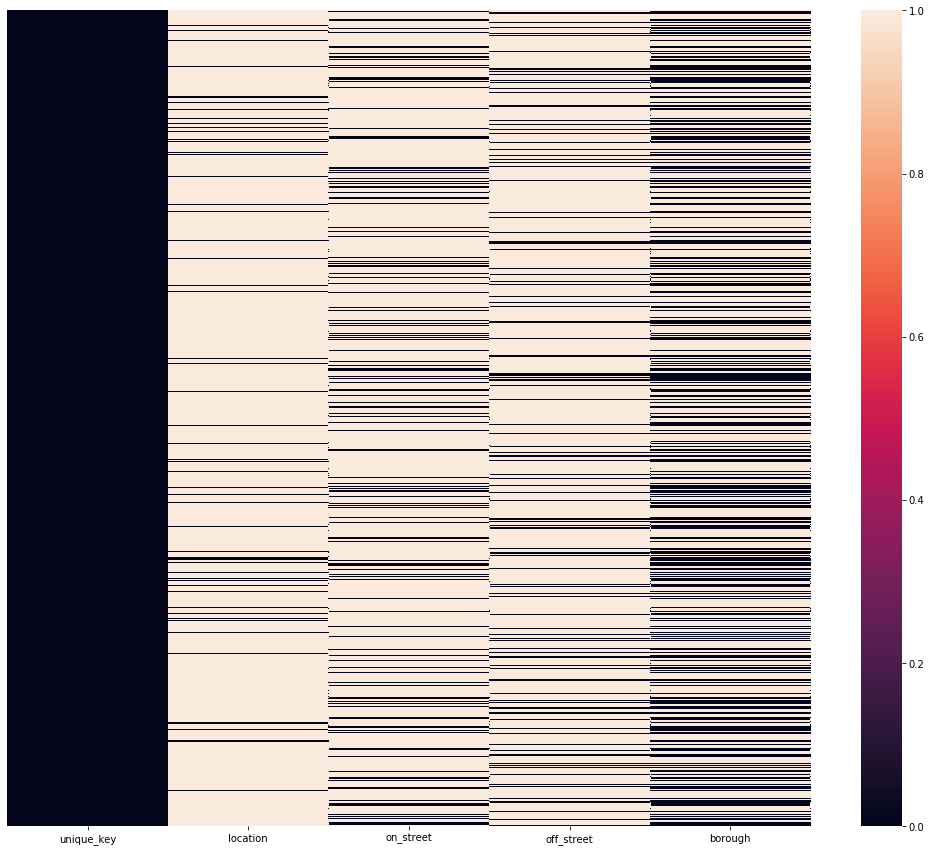

In [32]:
plt.figure(figsize=(18,15))
sns.heatmap(sup_data.isnull(),cbar=True,yticklabels=False)# giving unexpected error for function null_matrix so plotted manually

Apart from the unique_key column, there are a lot more missing values than our main data set. 
If the `unique_key` column in both the original and supplemental data has the same values in the same order, we'll be able to use `Series.mask()` to add our supplemental data to our original data. We can check this using the `Series.equals()` [method](:

In [33]:
mvc_keys = mvc['unique_key']
sup_keys = sup_data['unique_key']

is_equal = mvc_keys.equals(sup_keys)
print(is_equal)

True


In [34]:
# check null values before masking
location_cols = ['location', 'on_street', 'off_street', 'borough']
null_before = mvc[location_cols].isnull().sum()
print (null_before)

location       3885
on_street     13961
off_street    44093
borough       20646
dtype: int64


In [35]:
# check null values after masking
for col in location_cols:
    mvc[col] = mvc[col].mask(mvc[col].isnull(), sup_data[col])

null_after = mvc[location_cols].isnull().sum()
print(null_after)

location         77
on_street     13734
off_street    36131
borough         232
dtype: int64


We can continue working with this data: 
- Drop the rows that had suspect values for injured and killed totals.
- Clean the values in the vehicle_1 through vehicle_5 columns by analyzing the different values and merging duplicates and near-duplicates.
- Analyze whether collisions are more likely in certain locations, at certain times, or for certain vehicle types.